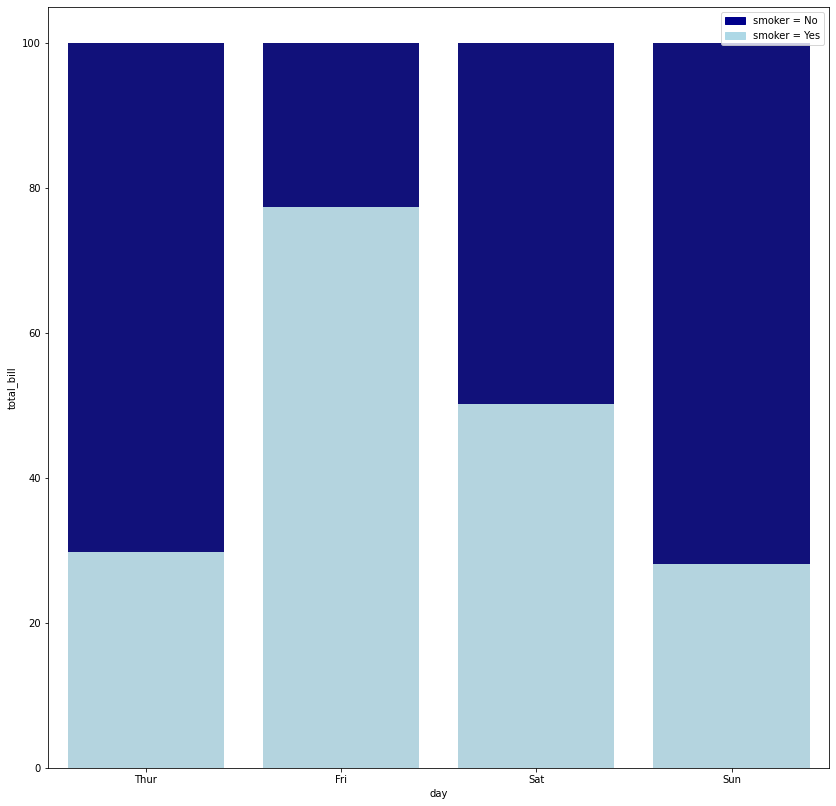

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# load dataset
tips = sns.load_dataset("tips")

# set the figure size
plt.figure(figsize=(14, 14))

# from raw value to percentage
total = tips.groupby('day')['total_bill'].sum().reset_index()
smoker = tips[tips.smoker=='Yes'].groupby('day')['total_bill'].sum().reset_index()
smoker['total_bill'] = [i / j * 100 for i,j in zip(smoker['total_bill'], total['total_bill'])]
total['total_bill'] = [i / j * 100 for i,j in zip(total['total_bill'], total['total_bill'])]

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

In [2]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


[2 3 5 6 7 4 8 7 6]


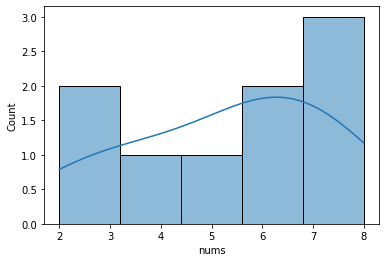

In [7]:
from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns

x_array = np.array([2,3,5,6,7,4,8,7,6])
df_orig = pd.DataFrame(x_array, columns=['nums'])

print(x_array)
sns.histplot(data=df_orig, x='nums', kde=True);

[0.11785113 0.1767767  0.29462783 0.35355339 0.41247896 0.23570226
 0.47140452 0.41247896 0.35355339]


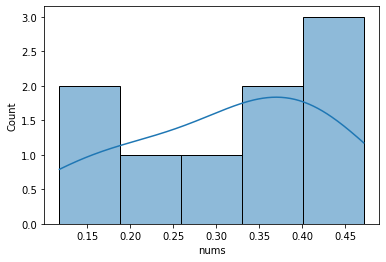

In [12]:
normalized_arr = preprocessing.normalize([x_array]).flatten()
print(normalized_arr)

df_norm = pd.DataFrame(normalized_arr, columns=['nums'])

sns.histplot(data=df_norm, x='nums', kde=True);

In [ ]:
month_lu = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr':4,
    'may':5,
    'jun':6,
    'jul':7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}

df = pd.read_csv('data/customers.csv', sep=';')
df['row_id'] = df.reset_index().index
df['month_num'] = df.month.map(month_lu)
df.month_num = pd.to_numeric(df.month_num, downcast='integer')
df.day = pd.to_numeric(df.day, downcast='integer')
df.head()

In [ ]:
df_pivot = df[['month_num', 'day', 'balance']].sort_values(by=['month_num', 'day'], ascending=True)
df_pivot = df_pivot.pivot_table(index='month_num', columns='day', values='balance').round()

plt.figure(figsize=(20, 6))
plt.title('Correlation between Month and Day')
sns.set_context('paper', font_scale=1.4)
sns.heatmap(df_pivot, cmap='Blues');